https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

In [1]:
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

path = sys.path[0]
sys.path.insert(1, path[:path.index("4Tipe")+5] + "/POO")

from Model import Model, Layer

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

X_train = (X_train / 255)
X_test = (X_test / 255)

x_train = X_train.reshape(len(X_train), 28*28) # 28*28 = 784
x_test = X_test.reshape(len(X_test), 28*28)

y_train = np.zeros((len(Y_train), 10))
y_train[np.arange(len(Y_train)), Y_train] = 1 # to categorical
y_test = np.zeros((len(Y_test), 10))
y_test[np.arange(len(Y_test)), Y_test] = 1 # to categorical

In [3]:
sigmoid = lambda x: 1/(1 + np.exp(-np.maximum(-500, x)))
relu = lambda x: np.maximum(0, x)
d_relu = lambda x: np.maximum(0, x)/np.maximum(0.001, x)

In [75]:
def softmax_(x):
    shape = x.shape
    if len(x.shape) < 2:
        print(f"Attention softmax shape {x.shape} : {x}")
    y = np.exp(np.maximum(x, 100))
    somme = np.sum(y, axis=1)
    y /= np.repeat(somme.reshape(somme.shape + (1, )), shape[1], axis=1)
    return y

In [ ]:
def loss_function(y_, y):
    

In [ ]:
def predict_loss(model, x, y):
    y_ = model.predict(x)  # y_ is predicted data
    loss = model.loss_function(y_, y)
    return y_, loss

In [76]:
c4T = lambda y_, y: - np.sum(y * np.log10(np.maximum(y_, 0.000_001)))

d_c4T = lambda y_, y: - y / np.maximum(y_, 0.000_001)

In [77]:
last_Layer = Layer(128, 10)

In [78]:
last_Layer.activation = softmax_
last_Layer.activation = softmax_

In [79]:
model = Model([
    Layer(784, 128),
    Layer(128, 128),
    Layer(128, 128),
    Layer(128, 10),
])

model = Model([
    Layer(784, 128),
    Layer(128, 128),
    Layer(128, 128),
    last_Layer,
])

model.loss_function = c4T
model.d_loss_function = d_c4T

for i in range(len(model.layers)):
    model.layers[i].w1 -= .5
    model.layers[i].w1 /= 128
    # model.layers[i].lr = 100_000
    """
    model.layers[i].activation = sigmoid
    
    model.layers[i].activation = relu
    model.layers[i].d_reluactivation = d_relu
    """

model.shape()

[(784, 128), (128, 128), (128, 128), (128, 10)]

100.0 510.0


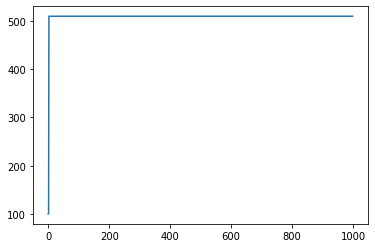

In [80]:
epochs = 1_000
loss = 1
losses = []
lr = 100_000
for epoch in range(epochs):
    predict, loss = model.backpropagation(x_train[i:i+100], y_train[i:i+100])
    losses.append(loss)
print(losses[0], losses[-1])
plt.plot(losses)

In [74]:
np.maximum(a, 0.5)

array([[0.5       , 0.55491881, 0.5       , 0.74417901, 0.5       ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.86032687, 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.62430206],
       [0.5       , 0.5       , 0.5       , 0.53494688, 0.92020172],
       [0.5       , 0.5       , 0.67062572, 0.86206733, 0.5       ],
       [0.55572291, 0.7542164 , 0.5       , 0.87476029, 0.70761989],
       [0.87883331, 0.5       , 0.61212922, 0.5       , 0.64097457],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.52633364],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ]])

In [32]:
a = np.random.random((10, 5))
a

array([[0.23506208, 0.55491881, 0.22206104, 0.74417901, 0.25942643],
       [0.72281171, 0.54883224, 0.89908148, 0.46285844, 0.76415025],
       [0.86032687, 0.26627616, 0.02296425, 0.17193857, 0.49991035],
       [0.36952517, 0.23693134, 0.41695285, 0.2308434 , 0.62430206],
       [0.33707136, 0.12160158, 0.35724523, 0.53494688, 0.92020172],
       [0.46646277, 0.20756066, 0.67062572, 0.86206733, 0.10609086],
       [0.55572291, 0.7542164 , 0.04029132, 0.87476029, 0.70761989],
       [0.87883331, 0.14986012, 0.61212922, 0.10524219, 0.64097457],
       [0.40247509, 0.30971071, 0.01647674, 0.09773511, 0.52633364],
       [0.32734579, 0.46140362, 0.30044468, 0.42452027, 0.04972424]])

In [60]:
a[1, :] = 1

In [62]:
a

array([[0.23506208, 0.55491881, 0.22206104, 0.74417901, 0.25942643],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.86032687, 0.26627616, 0.02296425, 0.17193857, 0.49991035],
       [0.36952517, 0.23693134, 0.41695285, 0.2308434 , 0.62430206],
       [0.33707136, 0.12160158, 0.35724523, 0.53494688, 0.92020172],
       [0.46646277, 0.20756066, 0.67062572, 0.86206733, 0.10609086],
       [0.55572291, 0.7542164 , 0.04029132, 0.87476029, 0.70761989],
       [0.87883331, 0.14986012, 0.61212922, 0.10524219, 0.64097457],
       [0.40247509, 0.30971071, 0.01647674, 0.09773511, 0.52633364],
       [0.32734579, 0.46140362, 0.30044468, 0.42452027, 0.04972424]])

In [61]:
softmax_(a)

array([[0.16522103, 0.22749786, 0.16308688, 0.27489826, 0.16929597],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.31400054, 0.17335543, 0.13591532, 0.15774919, 0.21897951],
       [0.19665413, 0.17223377, 0.2062057 , 0.17118841, 0.253718  ],
       [0.17132117, 0.13811273, 0.17481248, 0.20880807, 0.30694554],
       [0.19300938, 0.14898367, 0.23672562, 0.28667333, 0.134608  ],
       [0.18668384, 0.22767291, 0.11149558, 0.25684015, 0.21730752],
       [0.28588   , 0.13790968, 0.2189554 , 0.13189169, 0.22536322],
       [0.22419762, 0.20433555, 0.15240318, 0.16530428, 0.25375936],
       [0.20094232, 0.22976929, 0.19560881, 0.22144901, 0.15223058]])